In [1]:
from __future__ import division

%matplotlib inline
import pandas as pd
import thinkdsp
import thinkplot
import autocorr
import numpy as np
from magnitude import magnitude

In [2]:
data_dict = {}
name = 'ryan'
acts = ['walking', 'jogging', 'upstairs', 'downstairs']
data_file_names = ['data/{}_{}.csv'.format(name, activity) for activity in acts]
for i,file in enumerate(data_file_names):
    df = pd.read_csv(file)
    data_dict[acts[i]] = df

In [3]:
def evenly_sample_ts(ts):
    return np.linspace(ts.min(), ts.max(), len(ts))

/home/rlouie/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


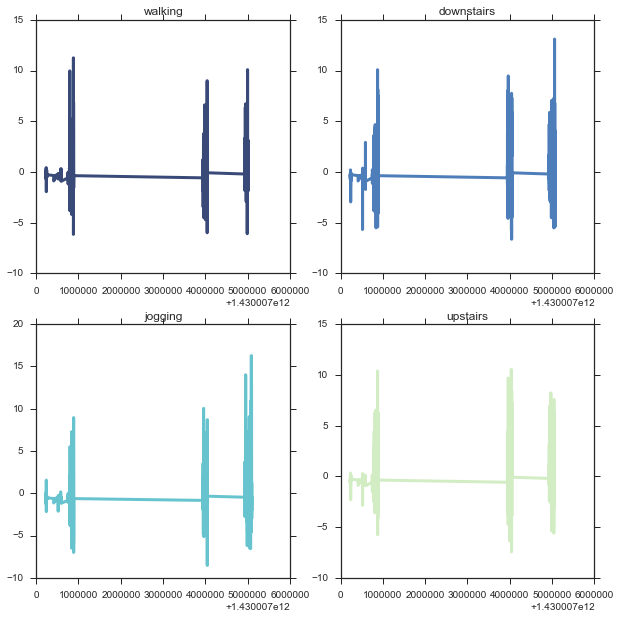

In [4]:
thinkplot.preplot(4, 2, 2)

for plotnum, (g, gdb) in enumerate(data_dict.iteritems()):
    time = gdb.time.values
    vals = magnitude(gdb[["x","y","z"]])
    vals -= vals.mean()
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals) 
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=g)

In [5]:
# evenly_sample_ts(